Patient 13 | Affected: right | M2: 1.19
Patient 14 | Affected: left | M2: 0.26
Patient 15 | Affected: right | M2: 40.55
Patient 16 | Affected: left | M2: 1.20
Patient 17 | Affected: left | M2: 3.35
Patient 18 | Affected: right | M2: 1.24
Patient 21 | Affected: left | M2: 0.66
Patient 22 | Affected: right | M2: 3.08
Patient 23 | Affected: left | M2: 20.28
Patient 24 | Affected: left | M2: 0.48
Patient 25 | Affected: left | M2: 1.86
Patient 26 | Affected: left | M2: 29.51
Patient 33 | Affected: left | M2: 0.97


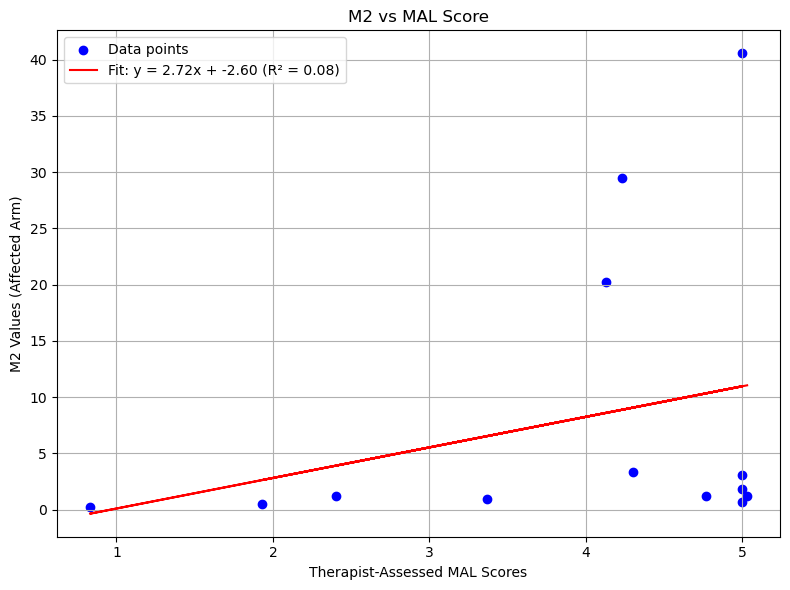

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress


DATA_FOLDER = r"C:\Users\Leo\Downloads\Data (1)\Data"


patients_df = pd.read_csv(os.path.join(DATA_FOLDER, "patients.csv"))
patient_ids = patients_df["patient"].tolist()
affected_sides = patients_df["affected"].tolist()
mal_scores = patients_df["MAL amount"].tolist()

m2_values = []


for pid, side in zip(patient_ids, affected_sides):
    try:
        file_path = os.path.join(DATA_FOLDER, str(pid), f"LOG_{side.capitalize()}.csv")
        df = pd.read_csv(file_path, skiprows=6)
        df.columns = ["x", "y", "z"]

        acc_mag = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)-9.8
        m2 = np.mean(acc_mag)
        m2_values.append(m2)

        print(f"Patient {pid} | Affected: {side} | M2: {m2:.2f}")
    except Exception as e:
        print(f"⚠️ Error processing Patient {pid}: {e}")
        m2_values.append(np.nan)


mal_scores_np = np.array(mal_scores)
m2_values_np = np.array(m2_values)

valid_idx = ~np.isnan(m2_values_np)
x = mal_scores_np[valid_idx]
y = m2_values_np[valid_idx]

# === PLOT ===
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Data points")

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color="red", label=f"Fit: y = {slope:.2f}x + {intercept:.2f} (R² = {r_value**2:.2f})")
plt.legend()


plt.xlabel("Therapist-Assessed MAL Scores")
plt.ylabel("M2 Values (Affected Arm)")
plt.title("M2 vs MAL Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("M2_vs_MAL_plot.png")
plt.show()

